# Simulate the Climbing Game

In [1]:
from environment import ClimbingGame
from agent import RandomAgent, QLearner
from HystereticQLearner import HystereticQLearner
from boltzmann import selection as boltzmann_policy
from utils import simulate_task
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed()

## Test Bed

In [2]:
# Simulate
## Parameters

exploration_rate = None
def discount_rate(_): return 0
def learning_rate(_): return 0.1
def decrease_rate(_): return 0.01

temperature_start = None  # Replace T = num with T = temperature_start maybe?
timesteps = 10000
num_simulations = 10


## Climbing Game Normal

In [3]:
# Simulate
## Parameters

task = ClimbingGame()

agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)

rewards = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

#------------------------#
| Simulation 0          |
#------------------------#


/home/davin/Documents/GitHub/hysteretic-q-learning/boltzmann.py:13: RuntimeWarning: overflow encountered in double_scalars
  if e**(x/T) == np.Infinity and x > highInf:


#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#


Text(0, 0.5, 'Average reward')

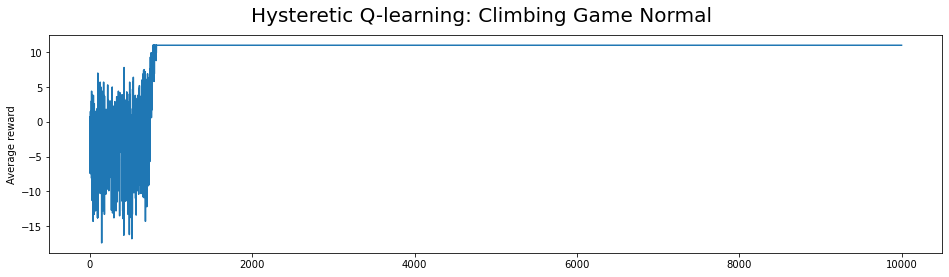

In [4]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(rewards, axis=0))
plt.plot(range(timesteps), np.average(rewards, axis=0))
fig.suptitle('Hysteretic Q-learning: Climbing Game Normal', fontsize=20)
plt.ylabel('Average reward')

## Climbing Game Part Stochastic

In [5]:
# Simulate
## Parameters

task = ClimbingGame(part_stochastic=True)

agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)

rewards = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

#------------------------#
| Simulation 0          |
#------------------------#


/home/davin/Documents/GitHub/hysteretic-q-learning/boltzmann.py:13: RuntimeWarning: overflow encountered in double_scalars
  if e**(x/T) == np.Infinity and x > highInf:


#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#


Text(0, 0.5, 'Average reward')

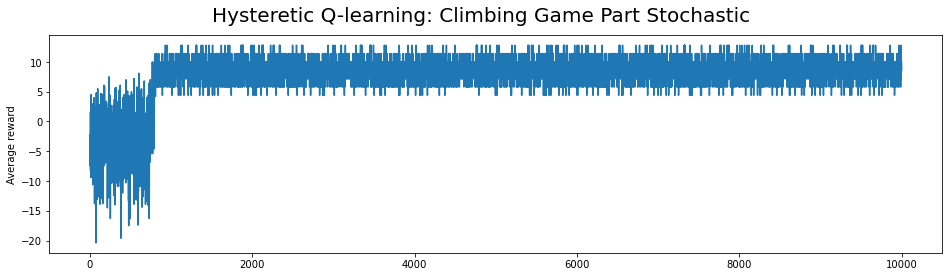

In [6]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(rewards, axis=0))
plt.plot(range(timesteps), np.average(rewards, axis=0))
fig.suptitle('Hysteretic Q-learning: Climbing Game Part Stochastic', fontsize=20)
plt.ylabel('Average reward')


## Climbing Game Full Stochastic

In [7]:
# Simulate
## Parameters

task = ClimbingGame(full_stochastic=True)

agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)

rewards = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

#------------------------#
| Simulation 0          |
#------------------------#


/home/davin/Documents/GitHub/hysteretic-q-learning/boltzmann.py:13: RuntimeWarning: overflow encountered in double_scalars
  if e**(x/T) == np.Infinity and x > highInf:


#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#


Text(0, 0.5, 'Average reward')

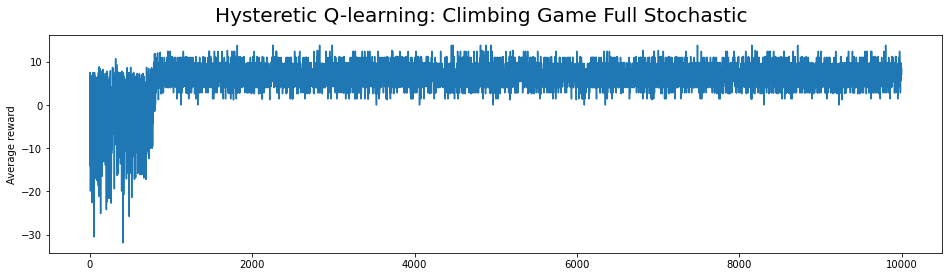

In [8]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(rewards, axis=0))
plt.plot(range(timesteps), np.average(rewards, axis=0))
fig.suptitle('Hysteretic Q-learning: Climbing Game Full Stochastic', fontsize=20)
plt.ylabel('Average reward')


## Divider

In [9]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

random_agents = (RandomAgent(task), RandomAgent(task))

num_games = 1263
num_simulations = 500
random_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(random_agents, task, t)
        random_rewards[i][t - 1] = random_agents[0].accumulated_reward
        random_agents[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

#------------------------#
| Simulation 0          |
#------------------------#


KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(random_rewards, axis=0))
plt.plot(range(num_games), np.average(random_rewards, axis=0))
fig.suptitle('Random agent', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

q_learners = (QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy), QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy))

num_games = 1263
num_simulations = 1
q_learn_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(q_learners, task, t, T)
        q_learn_rewards[i][t - 1] = q_learners[0].accumulated_reward
        q_learners[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(q_learn_rewards, axis=0))
plt.plot(range(num_games), np.average(q_learn_rewards, axis=0))
fig.suptitle('Decentralized Q-Learning', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
# Simulate
## Parameters

task = ClimbingGame()

agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)

rewards = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(rewards, axis=0))
plt.plot(range(timesteps), np.average(rewards, axis=0))
fig.suptitle('Hysteretic Q-learning', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

random_agents = (RandomAgent(task), RandomAgent(task))

num_games = 1263
num_simulations = 500
random_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(random_agents, task, t)
        random_rewards[i][t - 1] = random_agents[0].accumulated_reward
        random_agents[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(random_rewards, axis=0))
plt.plot(range(num_games), np.average(random_rewards, axis=0))
fig.suptitle('Random agent', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

q_learners = (QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy), QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy))

num_games = 1263
num_simulations = 1
q_learn_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(q_learners, task, t, T)
        q_learn_rewards[i][t - 1] = q_learners[0].accumulated_reward
        q_learners[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(q_learn_rewards, axis=0))
plt.plot(range(num_games), np.average(q_learn_rewards, axis=0))
fig.suptitle('Decentralized Q-Learning', fontsize=20)
plt.ylabel('Average reward')

## Test with a "dumb" agent

In [ ]:
from agent import FixedAgent

task = ClimbingGame()


import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

agents = (HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy), 
          FixedAgent(task, 'A'))

num_games = 1263
num_simulations = 500
base_line_rewards = np.zeros((num_simulations, num_games))



for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")
    T = 5000
    t = 0
    while(t < num_games):
            t, T = simulate_task(agents, task, t, T)
            base_line_rewards[i][t - 1] = agents[0].accumulated_reward
            agents[0].accumulated_reward = 0

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(num_games), np.average(base_line_rewards, axis=0))
fig.suptitle('Hysteretic with Dummy agent', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

learners = (QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy), 
              FixedAgent(task, 'A'))

num_games = 1263
num_simulations = 500
baseline_q_learn_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(learners, task, t, T)
        baseline_q_learn_rewards[i][t - 1] = learners[0].accumulated_reward
        learners[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(num_games), np.average(baseline_q_learn_rewards, axis=0))
fig.suptitle('Q-learning with Dummy agent', fontsize=20)
plt.ylabel('Average reward')